In [112]:
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# Exercice 1 : Un medecin souhaite mettre en lien l'impact de differentes variables mesurees sur
#un 'score' qu'il estime pour quantifier le niveau d'une maladie. Les donnees sont
#sauvegardees dans le fichier 'obs2021_1.csv'. Idealement, il souhaiterait que seul un
#sous ensemble de ces variables permette d'expliquer le score.
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++



import pandas
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

df=pandas.read_csv("./obs2021_1.csv",sep=';')

listColNames=list(dataframe.columns)


XY=dataframe.values
ColNb_Y=listColNames.index('score')


Y=XY[:,ColNb_Y].reshape((XY.shape[0],1))   #reshape is to make sure that Y is a column vector
X = np.delete(XY, ColNb_Y, 1)

listColNames.pop(ColNb_Y)     #to make it contains the column names of X only
df.head(5)

,var01,var02,var03,var04,var05,var06,var07,var08,var09,var10,var11,var12,var13,var14,var15,var16,var17,var18,score
0,11.6,6.4,4.3,7.2,14.4,19.26,39.32,50.00,13.040000,0.20,0.0440,-1.578984,2.209,9.02,0.26,94.285053,3.56,16.91,6
1,15.5,10.5,4.9,6.9,13.7,8.57,36.78,22.57,18.713333,0.51,0.8501,-2.497499,0.339,22.43,0.10,86.766527,7.06,-3.47,6
2,15.3,6.5,4.2,6.4,13.6,13.48,25.90,8.25,8.246667,0.27,0.9629,-3.638758,0.339,17.94,0.13,107.336147,3.20,10.05,10
3,13.4,7.7,4.1,5.8,14.2,15.23,44.36,11.09,11.093333,0.67,-0.2756,-6.273760,1.611,11.38,0.20,136.516384,4.33,-3.62,18
4,16.0,5.2,3.2,5.7,12.8,8.37,19.62,7.44,6.386667,0.24,-0.6928,-2.096575,0.659,8.56,0.27,88.774469,4.57,1.56,7


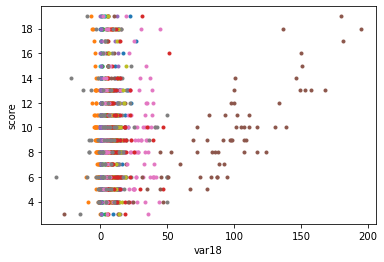

In [113]:
#QUESTION 1.1 : Observez les donnees unes par unes. Est-ce que vous identifiez visuellement des liens entre
#certaines variables et la variable 'score'. Si oui, lesquels ?

for Col in range(len(listColNames)):
  plt.plot(X[:,Col],Y[:],'.')
  plt.xlabel(listColNames[Col])
  plt.ylabel('score')
  #plt.show()


#### Les variables 1, 12, 16,

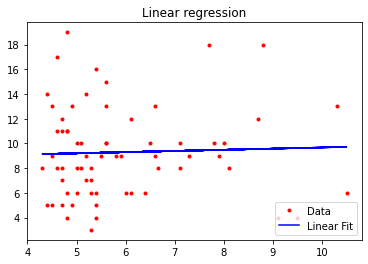

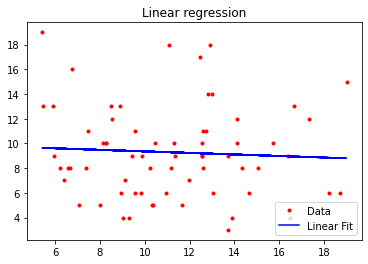

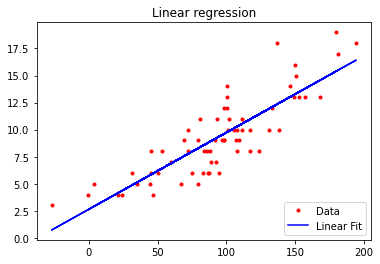

[13.548795843877867, 13.523200532992492, 3.833346710573031]


In [114]:
#QUESTION 1.2 :   On se demande si il est possible de predire le niveau de 'score' à partir d'une
#               seule des variables 'var02', 'var09' ou 'var16'.

#QUESTION 1.2.1 : Effectuez une regression lineaire simple entre 'score' et chacune de ces
#               variables.  Toutes les donnees seront utilisees pour l'apprentissage. Evaluez alors la
#               qualité des predictions, sur toutes les donnees, l'aide de la moyenne de l'erreur de
#               prediction sur toutes les donnees, l'aide de la moyenne de l'erreur de prediction au
#               carre (MSE). Quel est le risque potentiel en utilisant cette stratégie de validation
#               de l'apprentissage ?

from sklearn.linear_model import LinearRegression
L= [1,8,15]
MSE = []
for x in L:
    X2= X[:,x,np.newaxis]
    lr = LinearRegression()

    lr.fit(X2,Y)

    fig = plt.figure()
    plt.plot(X2, Y, 'r.')
    Y_pred = lr.predict(X2)
    erreur = Y_pred - Y
    mse = np.mean(erreur*erreur)
    MSE += [mse]
    plt.plot(X2, Y_pred, 'b-')
    plt.legend(('Data', 'Linear Fit'), loc='lower right')
    plt.title('Linear regression')
    plt.show()

print (MSE)

In [115]:
#QUESTION 1.2.2 : Evaluez a quel point les predictions sont stables a l'aide d'une methode de validation croisee
#               de type 5-folds.


from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

kf = KFold(n_splits=5)
for l in L:
  sum_mse_scores=0.
  for train, test in kf.split(X):
        X_train=X[train,l, np.newaxis]
        y_train=Y[train]
        X_test=X[test,l,np.newaxis]
        y_test=Y[test]
    
        lr = LinearRegression()
        lr.fit(X_train, y_train)
    
        y_pred = lr.predict(X_test)
        mse_score = mean_squared_error(y_test, y_pred)
        sum_mse_scores+=mse_score
  print(l," total: ",sum_mse_scores/5)


1  total:  14.941458117496378
8  total:  14.25287157588833
15  total:  4.119884056119778


In [116]:
Y_mean = np.ones(len(Y))
mean = sum(Y)/len(Y)
for i in range(66):
    Y_mean[i] = mean

Y_mean.shape



(66,)

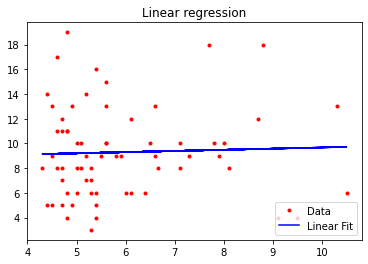

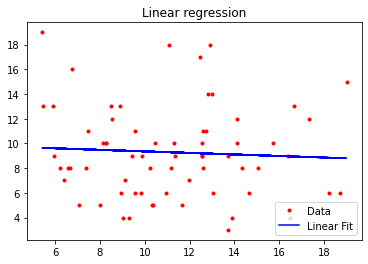

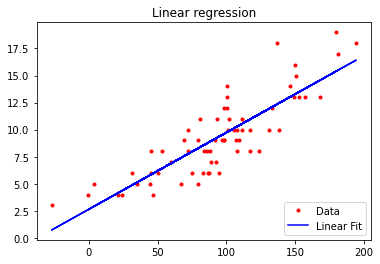

[array([0.00146257]), array([0.00334893]), array([0.71748484])]


In [117]:
#QUESTION 1.2.3 : Peut-on enfin dire si on observe une relation significative entre 'score'
#               et (independament) 'var02', 'var09' ou bien 'var16'. On peut le valider
#               a l'aide d'un test d'hypothese dont on decrira la procedure.

#### On considère qu'il y a bien corrélation si R**2 > 0,7

from sklearn.linear_model import LinearRegression
L= [1,8,15]
MSE = []
R = []
for x in L:
    X2= X[:,x,np.newaxis]
    lr = LinearRegression()

    lr.fit(X2,Y)

    fig = plt.figure()
    plt.plot(X2, Y, 'r.')
    Y_pred = lr.predict(X2)
    SST = sum((Y-mean)*(Y-mean))
    SSR = sum((Y_pred-mean)*(Y_pred-mean))
    erreur = Y_pred - Y
    mse = np.mean(erreur*erreur)
    MSE += [mse]
    r = SSR/SST
    R+= [r]
    plt.plot(X2, Y_pred, 'b-')
    plt.legend(('Data', 'Linear Fit'), loc='lower right')
    plt.title('Linear regression')
    plt.show()

print (R)

[(29, 0.30104958877196186), (48, 0.2897340217675924)]
[(49, 9.480069068487184), (29, 9.513469491267475)]


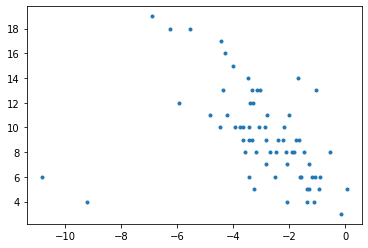

In [118]:
#QUESTION 1.3 : On s'interesse maintenant au lien entre la variable 'score' et 'var12'.
#               On peut remarquer que ces donnees contiennent deux valeurs aberrantes.
#
#QUESTION 1.3.1 : Definissez une procedure pour detecter automatiquement deux donnees aberrantes dans
#               un jeu de donnees.
#

### Test de la qualité de la regression après suppression d'une observation

from sklearn.linear_model import LinearRegression
L= 11
MSE = []
R = []
plt.plot(X[:,11],Y[:],'.')
for i in range(66):
    X2= np.concatenate((X[:i,L,np.newaxis],X[i+1:,L,np.newaxis]),axis=0)
    lr = LinearRegression()
    Y2= np.concatenate((Y[:i],Y[i+1:]),axis=0)
    lr.fit(X2,Y2)

 
    Y_pred = lr.predict(X2)
    SST = np.sum((Y2-mean)*(Y2-mean))
    SSR = np.sum((Y_pred-mean)*(Y_pred-mean))
    erreur = Y_pred - Y2
    mse = np.mean(erreur*erreur)
    MSE += [mse]
    r = SSR/SST
    R+= [r]

#print(MSE)
#print(R)


############### Recherche d'outlier #########

## Méthode de maximisation du R²
Outlier1 = []
rMax = max(R)
rMax_ind = R.index(rMax)
R.pop(rMax_ind)
Outlier1 += [(rMax_ind,rMax)]
rMax2 = max(R)
rMax_ind2 = R.index(rMax2)
R.pop(rMax_ind2)
Outlier1 += [(rMax_ind2,rMax2)]
print(Outlier1)

## Méthode de minimisation de la MSE
Outlier2 = []
mMin = min(MSE)
mMin_ind = MSE.index(mMin)
MSE.pop(mMin_ind)
Outlier2 += [(mMin_ind,mMin)]
mMin2 = min(MSE)
mMin_ind2 = MSE.index(mMin2)
MSE.pop(mMin_ind2)
Outlier2 += [(mMin_ind2,mMin2)]
print(Outlier2)



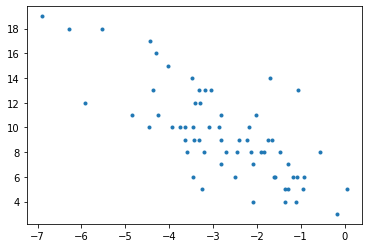

In [119]:
#QUESTION 1.3.2 : Nous supprimerons dans la suite de cet exercice les deux observations qui sont aberrantes sur
#               la variable 'var12'. 

### Suppression des Outliers

X_new = np.delete(X,29,0)
X_new2 = np.delete(X_new,48,0)
Y_new = np.delete(Y,29)
Y_new2 = np.delete(Y_new,48)
plt.plot(X_new2[:,11],Y_new2[:],'.')



In [120]:
#QUESTION 1.3.2 : . Comment auriez-vous traite ces observations si vous aviez absolument
#                voulu preserver l'information qu'elles contiennent dans les autres variables ?


# Remplacer les valeurs par une prédicition : on apprend sur les n-2 observations, puis on remplace les deux outliers 
# par la prédiction de notre régression linéaire. 

In [121]:
#QUESTION 1.4 :   Une fois les deux observations aberrantes de 'var12' supprimees, on souhaite selectionner les
#               variables de 'X' qui permettent de prédire au mieux 'score' a l'aide de la
#               regression multiple regularisee.

#QUESTION 1.4.1 : Quelle strategie vous semble la plus appropriee pour selectionner les variables les plus
#               pertinentes ? Quel pretraitement allez-vous de meme effectuer sur les donnees.

### Regression Lasso --> Normaliser les vecteurs

from sklearn.preprocessing import normalize

for i in range(X_new2.shape[1]):
    X_new2[:,i] = X_new2[:,i]/np.linalg.norm(X_new2[:,i])

#Y_new2 = Y_new2/np.linalg.norm(Y_new2)
thresh= len(X_new2) // 2
X_train = X_new2[thresh:]
y_train = Y_new2[thresh:]
X_test = X_new2[:thresh]
y_test = Y_new2[:thresh]
print(np.linalg.norm(X_new2[:,1]))
print(X_new2.shape)

1.0
(64, 18)


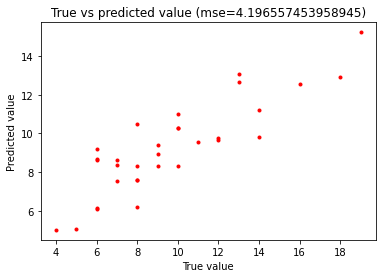

In [122]:
#QUESTION 1.4.2 : Effectuez la procedure de selection des variables optimales en parametrant a la main le poids
#               entre la qualite de prediction et le niveau de regularisation.

from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold

alpha = 0.03

lasso_regressor = Lasso(alpha=alpha)
lasso_regressor.fit(X_train, y_train)

y_pred_lasso = lasso_regressor.predict(X_test)
mse_score_lasso = mean_squared_error(y_test, y_pred_lasso)

fig = plt.figure()
plt.plot(y_test, y_pred_lasso, 'r.')
plt.xlabel('True value')
plt.ylabel('Predicted value')
plt.title('True vs predicted value (mse='+str(mse_score_lasso)+')')
plt.show()


In [129]:
#### Paramétrisation "à la main" du poids alpha

kf = KFold(n_splits=5)
for alpha in [0.02,0.022,0.024]:
  sum_mse_scores=0.
  compteur = 0
  for train, test in kf.split(X_new2):
    compteur +=1
    X_train=X_new2[train]
    y_train=Y_new2[train]
    X_test=X_new2[test]
    y_test=Y_new2[test]
  
    lasso_regressor = Lasso(alpha=alpha)
    lasso_regressor.fit(X_train, y_train)
    y_pred_lasso = lasso_regressor.predict(X_test)
    mse_score_lasso = mean_squared_error(y_test, y_pred_lasso)
    sum_mse_scores+=mse_score_lasso


  print(alpha," total: ", sum_mse_scores/compteur)
  print("List des Betas --> ", lasso_regressor.coef_.tolist())



mse : 4.427184568130792
mse : 4.739773759372804
mse : 1.947605143962592
mse : 2.780084928278109
mse : 1.702566935335681
0.02  total:  3.119443067015996
List des Betas -->  [0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, 0.001882125965932028, -0.0, -20.731233848275508, 0.0, -0.0, -0.0, 38.613653113739176, -0.0, -0.09371821364885022]
mse : 4.456241699987777
mse : 4.84953604883455
mse : 1.8898398752402454
mse : 2.778593002280698
mse : 1.7485094970650383
0.022  total:  3.144544024681662
List des Betas -->  [0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, 0.0, -0.0, -20.466037009989336, 0.0, -0.0, -0.0, 38.06119137459904, -0.0, -0.0]
mse : 4.509942966584531
mse : 4.962994909409313
mse : 1.8405455657732792
mse : 2.7830773585425392
mse : 1.7847158035310722
0.024  total:  3.176255320768147
List des Betas -->  [0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, 0.0, -0.0, -20.182567781181106, 0.0, -0.0, -0.0, 37.541548216725126, -0.0, -0.0]


In [ ]:
### alpha optimal --> 0.022

In [135]:
#QUESTION 1.4.3 : Effectuez la procedure automatique de parametrisation de ce poids, de sorte a ce qu'un maximum
#               de trois variables soit typiquement selectionne et que la qualite de prediction soit optimale.
#               Quelle methode de validation croisee vous semble la plus raisonnable ici ? La selection des
#               variables est-elle stable ?

alpha = 0.022
mse1 = 1
mse2 = 0
n=0
while (abs(mse1-mse2)>10**(-1) and n<500):
    n+=1
    A = [alpha+0.01,alpha-0.01]
    for a in A:
        compteur=0
        for train, test in kf.split(X_new2):
            compteur +=1
            X_train=X_new2[train]
            y_train=Y_new2[train]
            X_test=X_new2[test]
            y_test=Y_new2[test]
        
            lasso_regressor = Lasso(alpha=a)
            lasso_regressor.fit(X_train, y_train)
            y_pred_lasso = lasso_regressor.predict(X_test)
            mse_score_lasso = mean_squared_error(y_test, y_pred_lasso)
            #print("mse :", mse_score_lasso)
            sum_mse_scores+=mse_score_lasso
            if a>alpha:
                mse1=sum_mse_scores/compteur
            else:
                mse2=sum_mse_scores/compteur
    if mse1>mse2:
        alpha -= 0.001
    else:
        alpha += 0.001

print(alpha,mse1,mse2)

    


0.5220000000000004 27976.587919133708 27990.368586446468


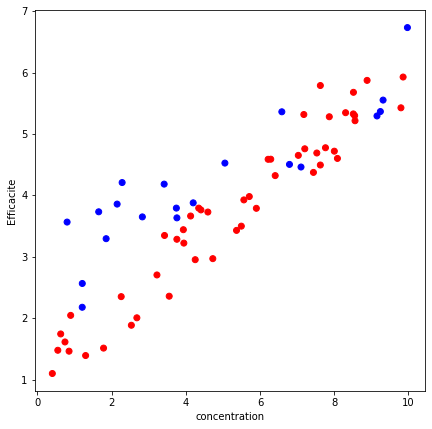

In [136]:
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++   
# Exercice 2 : Lors d'essais cliniques, un groupe pharmaceutique souhaite savoir si la
#              concentration d'un produit dans un traitement pour la vue a le meme effet
#              sur deux sous populations. Les resultats d'observations sont regroupes dans
#              le fichier obs2021_2.csv. Dans chacun des groupes, on supposera que le lien
#              entre la concentration du produit et l'efficacite du traitement est lineaire.
#              Definissez et appliquez une methodologie pour tester si l'impact de cette
#              concentration est similaire dans les deux groupes ?
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


import pandas
import numpy as np
import matplotlib.pyplot as plt

dataframe=pandas.read_csv("./obs2021_2.csv",sep=',')

plt.figure(figsize=(7,7))
plt.scatter(dataframe['concentration'], dataframe['Efficacite'], c=['r' if t == 'Groupe_1' else 'b' for t in dataframe['Groupe']])
plt.xlabel("concentration")
plt.ylabel("Efficacite")
plt.show()